<!--<img width=700px; src="../img/logoUPSayPlusCDS_990.png"> -->

<p style="margin-top: 3em; margin-bottom: 2em;"><b><big><big><big><big>Introduction to Pandas</big></big></big></big></b></p>

In [91]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

# 1. Let's start with a showcase

#### Case 1: titanic survival data

In [92]:
df = pd.read_csv("C:/Users/manas/Downloads/data/titanic.csv")

In [93]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Starting from reading this dataset, to answering questions about this data in a few lines of code:

**What is the age distribution of the passengers?**

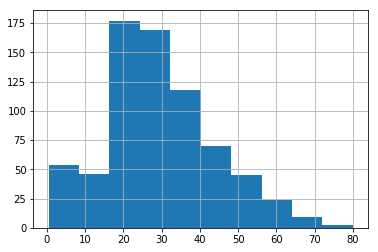

In [94]:
df['Age'].hist()

**How does the survival rate of the passengers differ between sexes?**

In [95]:
df.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

Survived
Sex             
female  0.742038
male    0.188908

**Or how does it differ between the different classes?**

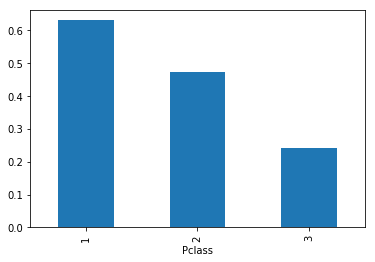

In [96]:
df.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')

All the needed functionality for the above examples will be explained throughout this tutorial.



#### Case 2: air quality measurement timeseries

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe

Starting from these hourly data for different stations:

In [97]:
data = pd.read_csv('C:/Users/manas/Downloads/data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [98]:
data.head()

BASCH  BONAP  PA18  VERS
timestamp                                    
2000-01-01 01:00:00  108.0    NaN  65.0  47.0
2000-01-01 02:00:00  104.0   60.0  77.0  42.0
2000-01-01 03:00:00   97.0   58.0  73.0  34.0
2000-01-01 04:00:00   77.0   52.0  57.0  29.0
2000-01-01 05:00:00   79.0   52.0  64.0  28.0

to answering questions about this data in a few lines of code:

**Does the air pollution show a decreasing trend over the years?**

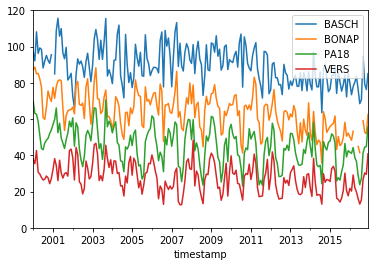

In [99]:
data['1999':].resample('M').mean().plot(ylim=[0,120])

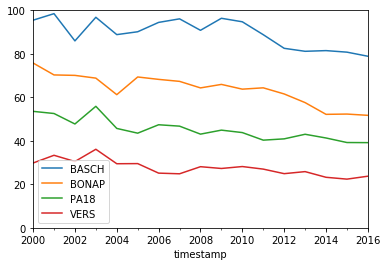

In [100]:
data['1999':].resample('A').mean().plot(ylim=[0,100])

**What is the difference in diurnal profile between weekdays and weekend?**

In [101]:
data['weekday'] = data.index.weekday
data['weekend'] = data['weekday'].isin([5, 6])
data_weekend = data.groupby(['weekend', data.index.hour])['BASCH'].mean().unstack(level=0)
data_weekend.plot()

We will come back to these example, and build them up step by step.

# 2. Pandas: data analysis in python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library has become essential.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogeneous data types, but it's also much, much more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing data, working with time series data, for reading and writing your data, for reshaping, grouping, merging your data, ...

It's documentation: http://pandas.pydata.org/pandas-docs/stable/


** When do you need pandas? **

When working with **tabular or structured data** (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with scikit-learn, statsmodels, ...)

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

Pandas is great for working with heterogeneous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
<li>When working with array data (e.g. images, numerical algorithms): just stick with numpy</li>
<li>When working with multidimensional labeled data (e.g. climate data): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

# 2. The pandas data structures: `DataFrame` and `Series`

A `DataFrame` is a **tablular data structure** (multi-dimensional object to hold labeled data) comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can think of it as multiple Series object which share the same index.


<img align="left" width=50% src="img/schema-dataframe.svg">

In [102]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
..           ...       ...     ...   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
..                                                 ...     ...   ...    ...   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
..     ...               ...      ...   ...      ...  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Attributes of the DataFrame

A DataFrame has besides a `index` attribute, also a `columns` attribute:

In [103]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [104]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To check the data types of the different columns:

In [105]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

An overview of that information can be given with the `info()` method:

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Also a DataFrame has a `values` attribute, but attention: when you have heterogeneous data, all values will be upcasted:

In [107]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ..), one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [108]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

country  population    area    capital
0         Belgium        11.3   30510   Brussels
1          France        64.3  671308      Paris
2         Germany        81.3  357050     Berlin
3     Netherlands        16.9   41526  Amsterdam
4  United Kingdom        64.9  244820     London

### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labeled data**.

In [109]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [110]:
age = df['Age']

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`

In [111]:
age.index

RangeIndex(start=0, stop=891, step=1)

You can access the underlying numpy array representation with the `.values` attribute:

In [112]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [113]:
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [114]:
df = df.set_index('Name')
df

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
...                                                         ...       ...   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
...                                                    ...     ...   ...   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
...                                                   ...    ...   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
...                                                              ...      ...   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin Embarked  
Name                                                               
Braund, Mr. Owen Harris                              NaN        S  
Cumings, Mrs. John Bradley (Florence Briggs Tha...   C85        C  
Heikkinen, Miss. Laina                               NaN        S  
Futrelle, Mrs. Jacques Heath (Lily May Peel)        C123        S  
...                                                  ...      ...  
Graham, Miss. Margaret Edith                         B42        S  
Johnston, Miss. Catherine Helen "Carrie"             NaN        S  
Behr, Mr. Karl Howell                               C148        C  
Dooley, Mr. Patrick                           

In [115]:
age = df['Age']
age

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
                                                       ... 
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64

In [116]:
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

Eg element-wise operations:

In [117]:
age * 1000

Name
Braund, Mr. Owen Harris                                22000.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38000.0
Heikkinen, Miss. Laina                                 26000.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35000.0
                                                        ...   
Graham, Miss. Margaret Edith                           19000.0
Johnston, Miss. Catherine Helen "Carrie"                   NaN
Behr, Mr. Karl Howell                                  26000.0
Dooley, Mr. Patrick                                    32000.0
Name: Age, Length: 891, dtype: float64

A range of methods:

In [118]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [119]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

But also a lot of pandas specific methods, e.g.

In [120]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the maximum Fare that was paid? And the median?</li>
</ul>
</div>

In [121]:
df['Fare'].max()

512.3292

In [122]:
df['Fare'].median()

14.4542

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers (note: the 'Survived' column indicates whether someone survived (1) or not (0)).</li>
</ul>
</div>

In [123]:
df['Survived'].sum()/len(df['Survived'])

0.3838383838383838

# 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, stata
* (parquet)
* ...

Very powerful csv reader:

Luckily, if we have a well formed csv file, we don't need many of those arguments:

In [124]:
df = pd.read_csv("C:/Users/manas/Downloads/data/titanic.csv")

In [125]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<div class="alert alert-success">

<b>EXERCISE</b>: Read the `data/20000101_20161231-NO2.csv` file into a DataFrame `no2`
<br><br>
Some aspects about the file:
 <ul>
  <li>Which separator is used in the file?</li>
  <li>The second row includes unit information and should be skipped (check `skiprows` keyword)</li>
  <li>For missing values, it uses the `'n/d'` notation (check `na_values` keyword)</li>
  <li>We want to parse the 'timestamp' column as datetimes (check the `parse_dates` keyword)</li>
</ul>
</div>

In [126]:
no2 = pd.read_csv('C:/Users/manas/Downloads/data/20000101_20161231-NO2.csv', sep=';', skiprows=[1], na_values=['n/d'], index_col=0, parse_dates=True)

In [127]:
no2

BASCH  BONAP  PA18  VERS
timestamp                                    
2000-01-01 01:00:00  108.0    NaN  65.0  47.0
2000-01-01 02:00:00  104.0   60.0  77.0  42.0
2000-01-01 03:00:00   97.0   58.0  73.0  34.0
2000-01-01 04:00:00   77.0   52.0  57.0  29.0
...                    ...    ...   ...   ...
2016-12-31 20:00:00   73.0   51.0  49.0  20.0
2016-12-31 21:00:00   61.0   51.0  48.0  16.0
2016-12-31 22:00:00   57.0   49.0  45.0  14.0
2016-12-31 23:00:00   51.0   47.0  45.0  12.0

[149039 rows x 4 columns]

# 4. Exploration

Some useful methods:

`head` and `tail`

In [128]:
no2.head(3)

BASCH  BONAP  PA18  VERS
timestamp                                    
2000-01-01 01:00:00  108.0    NaN  65.0  47.0
2000-01-01 02:00:00  104.0   60.0  77.0  42.0
2000-01-01 03:00:00   97.0   58.0  73.0  34.0

In [129]:
no2.tail()

BASCH  BONAP  PA18  VERS
timestamp                                    
2016-12-31 19:00:00   77.0   49.0  52.0  23.0
2016-12-31 20:00:00   73.0   51.0  49.0  20.0
2016-12-31 21:00:00   61.0   51.0  48.0  16.0
2016-12-31 22:00:00   57.0   49.0  45.0  14.0
2016-12-31 23:00:00   51.0   47.0  45.0  12.0

`info()`

In [130]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149039 entries, 2000-01-01 01:00:00 to 2016-12-31 23:00:00
Data columns (total 4 columns):
BASCH    139949 non-null float64
BONAP    136493 non-null float64
PA18     142259 non-null float64
VERS     143813 non-null float64
dtypes: float64(4)
memory usage: 5.7 MB


Getting some basic summary statistics about the data with `describe`:

In [131]:
no2.describe()

BASCH          BONAP           PA18           VERS
count  139949.000000  136493.000000  142259.000000  143813.000000
mean       89.270098      64.001714      45.104211      27.613227
std        36.772855      27.866767      23.212719      19.604953
min         4.000000       0.000000       2.000000       0.000000
25%        63.000000      44.000000      28.000000      13.000000
50%        87.000000      62.000000      42.000000      22.000000
75%       112.000000      81.000000      59.000000      38.000000
max       358.000000     345.000000     306.000000     197.000000

Quickly visualizing the data

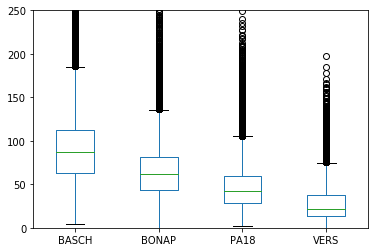

In [132]:
no2.plot(kind='box', ylim=[0,250])

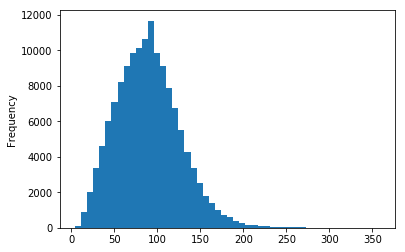

In [133]:
no2['BASCH'].plot(kind='hist', bins=50)

<div class="alert alert-success">

<b>EXERCISE</b>: 

 <ul>
  <li>Plot the age distribution of the titanic passengers</li>
</ul>
</div>

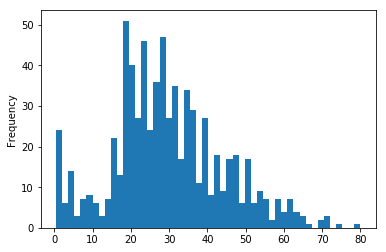

In [134]:
df["Age"].plot(kind = 'hist' , bins = 50)

The default plot (when not specifying `kind`) is a line plot of all columns:

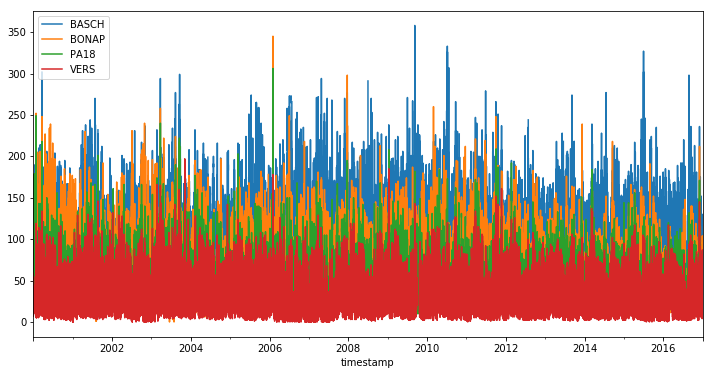

In [135]:
no2.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

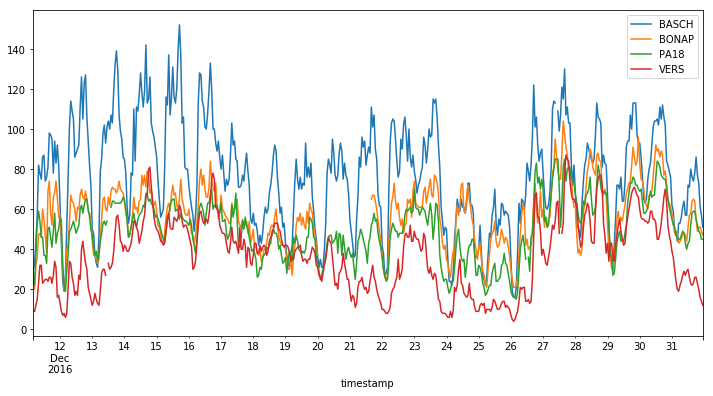

In [136]:
no2[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> see further in this notebook!

# 5. Selecting and filtering data

<div class="alert alert-warning">
<b>ATTENTION!</b>: <br><br>

One of pandas' basic features is the labeling of rows and columns, but this makes indexing also a bit more complex compared to numpy. <br><br> We now have to distuinguish between:

 <ul>
  <li>selection by **label**</li>
  <li>selection by **position**</li>
</ul>
</div>

In [137]:
df = pd.read_csv("C:/Users/manas/Downloads/data/titanic.csv")

### `df[]` provides some convenience shortcuts 

For a DataFrame, basic indexing selects the columns.

Selecting a single column:

In [138]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

or multiple columns:

In [139]:
df[['Age', 'Fare']]

Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
..    ...      ...
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]

But, slicing accesses the rows:

In [140]:
df[10:15]

PassengerId  Survived  Pclass                                  Name  \
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
11           12         1       1              Bonnell, Miss. Elizabeth   
12           13         0       3        Saundercock, Mr. William Henry   
13           14         0       3           Andersson, Mr. Anders Johan   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   

       Sex   Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
10  female   4.0      1      1    PP 9549  16.7000    G6        S  
11  female  58.0      0      0     113783  26.5500  C103        S  
12    male  20.0      0      0  A/5. 2151   8.0500   NaN        S  
13    male  39.0      1      5     347082  31.2750   NaN        S  
14  female  14.0      0      0     350406   7.8542   NaN        S

### Systematic indexing with `loc` and `iloc`

When using `[]` like above, you can only select from one axis at once (rows or columns, not both). For more advanced indexing, you have some extra attributes:
    
* `loc`: selection by label
* `iloc`: selection by position

In [141]:
df = df.set_index('Name')

In [142]:
df.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [143]:
df.loc['Bonnell, Miss. Elizabeth':'Andersson, Mr. Anders Johan', :]

PassengerId  Survived  Pclass     Sex   Age  \
Name                                                                          
Bonnell, Miss. Elizabeth                 12         1       1  female  58.0   
Saundercock, Mr. William Henry           13         0       3    male  20.0   
Andersson, Mr. Anders Johan              14         0       3    male  39.0   

                                SibSp  Parch     Ticket    Fare Cabin Embarked  
Name                                                                            
Bonnell, Miss. Elizabeth            0      0     113783  26.550  C103        S  
Saundercock, Mr. William Henry      0      0  A/5. 2151   8.050   NaN        S  
Andersson, Mr. Anders Johan         1      5     347082  31.275   NaN        S

Selecting by position with `iloc` works similar as indexing numpy arrays:

In [144]:
df.iloc[0:2,1:3]

Survived  Pclass
Name                                                                
Braund, Mr. Owen Harris                                    0       3
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1


The different indexing methods can also be used to assign data:

In [145]:
df.loc['Braund, Mr. Owen Harris', 'Survived'] = 100

In [146]:
df

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1       100   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
...                                                         ...       ...   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
...                                                    ...     ...   ...   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
...                                                   ...    ...   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
...                                                              ...      ...   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin Embarked  
Name                                                               
Braund, Mr. Owen Harris                              NaN        S  
Cumings, Mrs. John Bradley (Florence Briggs Tha...   C85        C  
Heikkinen, Miss. Laina                               NaN        S  
Futrelle, Mrs. Jacques Heath (Lily May Peel)        C123        S  
...                                                  ...      ...  
Graham, Miss. Margaret Edith                         B42        S  
Johnston, Miss. Catherine Helen "Carrie"             NaN        S  
Behr, Mr. Karl Howell                               C148        C  
Dooley, Mr. Patrick                           

### Boolean indexing (filtering)

Often, you want to select rows based on a certain condition. This can be done with 'boolean indexing' (like a where clause in SQL) and comparable to numpy. 

The indexer (or boolean mask) should be 1-dimensional and the same length as the thing being indexed.

In [147]:
df['Fare'] > 50

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)     True
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)            True
                                                       ...  
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                  False
Dooley, Mr. Patrick                                    False
Name: Fare, Length: 891, dtype: bool

In [148]:
df[df['Fare'] > 50]

PassengerId  Survived  \
Name                                                                        
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
McCarthy, Mr. Timothy J                                       7         0   
Fortune, Mr. Charles Alexander                               28         0   
...                                                         ...       ...   
Sage, Miss. Dorothy Edith "Dolly"                           864         0   
Roebling, Mr. Washington Augustus II                        868         0   
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)            872         1   
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)               880         1   

                                                    Pclass     Sex   Age  \
Name                                                                       
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
McCarthy, Mr. Timothy J                                  1    male  54.0   
Fortune, Mr. Charles Alexander                           1    male  19.0   
...                                                    ...     ...   ...   
Sage, Miss. Dorothy Edith "Dolly"                        3  female   NaN   
Roebling, Mr. Washington Augustus II                     1    male  31.0   
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)         1  female  47.0   
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)            1  female  56.0   

                                                    SibSp  Parch    Ticket  \
Name                                                                         
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0  PC 17599   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0    113803   
McCarthy, Mr. Timothy J                                 0      0     17463   
Fortune, Mr. Charles Alexander                          3      2     19950   
...                                                   ...    ...       ...   
Sage, Miss. Dorothy Edith "Dolly"                       8      2  CA. 2343   
Roebling, Mr. Washington Augustus II                    0      0  PC 17590   
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)        1      1     11751   
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)           0      1     11767   

                                                        Fare        Cabin  \
Name                                                                        
Cumings, Mrs. John Bradley (Florence Briggs Tha...   71.2833          C85   
Futrelle, Mrs. Jacques Heath (Lily May Peel)         53.1000         C123   
McCarthy, Mr. Timothy J                              51.8625          E46   
Fortune, Mr. Charles Alexander                      263.0000  C23 C25 C27   
...                                                      ...          ...   
Sage, Miss. Dorothy Edith "Dolly"                    69.5500          NaN   
Roebling, Mr. Washington Augustus II                 50.4958          A24   
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)     52.5542          D35   
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)        83.1583          C50   

                                                   Embarked  
Name                                                         
Cumings, Mrs. John Bradley (Florence Briggs Tha...        C  
Futrelle, Mrs. Jacques Heath (Lily May Peel)              S  
McCarthy, Mr. Timothy J                                   S  
Fortune, Mr. Charles Alexander                            S  
...                                                     ...  
Sage, Miss. Dorothy Edith "Dolly"                         S  
Roebling, Mr. Washington Augustus II                      S  
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)          S  
Potter, Mrs. Thomas Jr (Lily Alexenia Wi

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, select all rows for male passengers and calculate the mean age of those passengers. Do the same for the female passengers</li>
</ul>
</div>

In [149]:
df = pd.read_csv("C:/Users/manas/Downloads/data/titanic.csv")

In [150]:
df_male = df[df['Sex'] == 'male']
df_male['Age'].mean()

30.72664459161148

In [151]:
df_female = df[df['Sex'] == 'female']

In [152]:
df_female['Age'].mean()

27.915708812260537

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Based on the titanic data set, how many passengers older than 70 were on the Titanic?</li>
</ul>
</div>

In [153]:
len(df[df['Age'] > 70])

5

# 6. The group-by operation

### Some 'theory': the groupby operation (split-apply-combine)

In [154]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

key  data
0    A     0
1    B     5
2    C    10
3    A     5
..  ..   ...
5    C    15
6    A    10
7    B    15
8    C    20

[9 rows x 2 columns]

### Recap: aggregating functions

When analyzing data, you often calculate summary statistics (aggregations like the mean, max, ...). As we have seen before, we can easily calculate such a statistic for a Series or column using one of the many available methods. For example:

In [155]:
df['data'].sum()

90

However, in many cases your data has certain groups in it, and in that case, you may want to calculate this statistic for each of the groups.

For example, in the above dataframe `df`, there is a column 'key' which has three possible values: 'A', 'B' and 'C'. When we want to calculate the sum for each of those groups, we could do the following:

In [156]:
for key in ['A', 'B', 'C']:
    print(key, df[df['key'] == key]['data'].sum())

A 15
B 30
C 45


This becomes very verbose when having multiple groups. You could make the above a bit easier by looping over the different values, but still, it is not very convenient to work with.

What we did above, applying a function on different groups, is a "groupby operation", and pandas provides some convenient functionality for this.

### Groupby: applying functions per group

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

Instead of doing the manual filtering as above


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

pandas provides the `groupby` method to do exactly this:

In [157]:
df.groupby('key').sum()

data
key      
A      15
B      30
C      45

In [158]:
df.groupby('key').aggregate(np.sum)  # 'sum'

data
key      
A      15
B      30
C      45

And many more methods are available. 

In [159]:


df.groupby('key')['data'].sum()

key
A    15
B    30
C    45
Name: data, dtype: int64

### Application of the groupby concept on the titanic data

We go back to the titanic passengers survival data:

In [160]:
df = pd.read_csv("C:/Users/manas/Downloads/data/titanic.csv")

In [161]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average age for each sex again, but now using groupby.</li>
</ul>
</div>

In [162]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate the average survival ratio for all passengers.</li>
</ul>
</div>

In [163]:
df['Survived'].sum()/len(df['Survived'])

0.3838383838383838

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).</li>
</ul>
</div>

In [164]:
df_twenty_five = df[df['Age']<25]
df_twenty_five['Survived'].sum()/len(df_twenty_five['Survived'])

0.4244604316546763

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>What is the difference in the survival ratio between the sexes?</li>
</ul>
</div>

In [168]:
print(df.groupby('Sex'))

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Or how does it differ between the different classes? Make a bar plot visualizing the survival ratio for the 3 classes.</li>
</ul>
</div>

In [ ]:
# Code here 

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a bar plot to visualize the average Fare payed by people depending on their age. The age column is devided is separate classes using the `pd.cut` function as provided below.</li>
</ul>
</div>

In [ ]:
df['AgeClass'] = pd.cut(df['Age'], bins=np.arange(0,90,10))

In [ ]:
# Code here 


## Further reading

* Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/


*  Blog

  * https://tomaugspurger.github.io/modern-1.html

## Make a simple logistic Regression Model
* The model would be predicting whether a person with a certain attributes would survive or not
* Train with 70 percent of the data and take the y column as Survived or not
* You **CAN NOT** use any library to make the logistic regression model, you can use only numpy and pandas. The model has to be built from the scratch


In [3]:
#logistic regression
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot

In [63]:
df = pd.read_csv('C:/Users/manas/Downloads/data/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [64]:
df = df.set_index('Name')

In [65]:
y = df['Survived']

In [66]:
x = df.drop(columns = ['PassengerId' , 'Survived', 'SibSp' , 'Parch' , 'Ticket'  , 'Fare' , 'Cabin' , 'Embarked'])

In [67]:
impute_value = x['Age'].mean()

In [68]:
age = x['Age']
not_null = age.notnull()

In [69]:
for c in range(len(age)):                           #imputes values in missinng spaces
    if not_null[c] == False: 
        x['Age'][c] = impute_value

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
#one-hot-encoding for Sex column
x['male'] = 0
x['female'] = 0
for c in range(891):
    if x['Sex'][c] == 'male':
        x['male'][c] = 1
        x['female'][c] = 0
    else:
        x['female'][c] = 1
        x['male'][c] = 0
x.head()

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is tryi

Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen, Mr. William Henry                                 3    male  35.0   

                                                    male  female  
Name                                                              
Braund, Mr. Owen Harris                                1       0  
Cumings, Mrs. John Bradley (Florence Briggs Tha...     0       1  
Heikkinen, Miss. Laina                                 0       1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)           0       1  
Allen, Mr. William Henry                               1       0

In [71]:
x = x.drop(['Sex'] , axis = 1)

In [72]:
x['x0'] = 1
x.head()

Pclass   Age  male  \
Name                                                                     
Braund, Mr. Owen Harris                                  3  22.0     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0     0   
Heikkinen, Miss. Laina                                   3  26.0     0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0     0   
Allen, Mr. William Henry                                 3  35.0     1   

                                                    female  x0  
Name                                                            
Braund, Mr. Owen Harris                                  0   1  
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1   1  
Heikkinen, Miss. Laina                                   1   1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1   1  
Allen, Mr. William Henry                                 0   1

In [73]:
x['Age'] = x['Age']/(x['Age'].max()-x['Age'].min()) #normalize age
x.head()

Pclass       Age  male  \
Name                                                                         
Braund, Mr. Owen Harris                                  3  0.276451     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  0.477507     0   
Heikkinen, Miss. Laina                                   3  0.326715     0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  0.439809     0   
Allen, Mr. William Henry                                 3  0.439809     1   

                                                    female  x0  
Name                                                            
Braund, Mr. Owen Harris                                  0   1  
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1   1  
Heikkinen, Miss. Laina                                   1   1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1   1  
Allen, Mr. William Henry                                 0   1

In [74]:
#sigmoid function
def sigmoid(x , parameters):
    return 1.0/(1 + np.exp(-np.dot(x , parameters.T)))

In [75]:
#cost function
def costf(parameters , x , y , m):
        cost = 0
        for i in range(int(m)):
            cost1 = -y[i]*np.log(sigmoid(x[i] , parameters))
            cost2 = -(1-y[i])*np.log(1-sigmoid(x[i] , parameters))
            cost_total = (cost1+cost2)/float(m)
            cost = cost + cost_total
        return cost   

In [76]:
#derivative
def derivative (parameters , x , y , m):
    derivative = 0
    for i in range(int(m)):
        derivative = derivative + ((sigmoid(x[i] , parameters) - y[i])*x[i])/float(m)
    return derivative


In [77]:
x_matrix = np.array(x)

In [78]:
np.random.seed(0)
parameters = np.random.randn(1,5)

In [79]:
parameters

array([[1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799]])

In [80]:
paramerters_first_run = [-1.60429636 , 2,42519949 , 1,58234562 , 0.58274447 , 0.80651509]

In [81]:
x_train = x_matrix[:624]
y_train = y[:624]
x_test = x_matrix[624:]
y_test = y[624:]

In [82]:
#gradient descent
lr = 0.01
converge_change = 0.001
cost = costf(parameters , x_train , y_train , m=624)
change_cost = 1
num_iter = 1
while (change_cost>converge_change):
    if num_iter > 500 : break
    old_cost = cost
    parameters = parameters - (lr*derivative(parameters , x_train , y_train , m=624))
    cost = costf(parameters , x_train , y_train , m=624)
    change_cost = old_cost - cost
    num_iter += 1

In [83]:
print(parameters)
print(num_iter)

[[-0.72241599  0.01683288  0.15115388  2.08258381  0.8816645 ]]
228


In [84]:
predictions = []
for i in range(len(y_test)):
    if sigmoid(x_test[i] , parameters)>0.5:
        predictions.append(1)
    else:
        predictions.append(0)

In [85]:
#no of correct predictions
count = 0
for i in range(len(y_test)):
    if predictions[i] == y_test[i]:
        count += 1
print(count)

206


## Make a linear Regression model
* The model would be predicting The age of a given passenger using all the other known attributes of the person
* Train with 70 percent of the data and take the y column as Age
* You **CAN NOT** use any library to make the logistic regression model, you can use only numpy and pandas. The model has to be built from the scratch


In [4]:
df = pd.read_csv('C:/Users/manas/Downloads/data/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
df = df.set_index('Name')

In [6]:
x1 = df.drop(columns = ['PassengerId' , 'Age' , 'Ticket' , 'Fare', 'Cabin' , 'Embarked'])
x1.head()

Survived  Pclass     Sex  \
Name                                                                           
Braund, Mr. Owen Harris                                    0       3    male   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1  female   
Heikkinen, Miss. Laina                                     1       3  female   
Futrelle, Mrs. Jacques Heath (Lily May Peel)               1       1  female   
Allen, Mr. William Henry                                   0       3    male   

                                                    SibSp  Parch  
Name                                                              
Braund, Mr. Owen Harris                                 1      0  
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0  
Heikkinen, Miss. Laina                                  0      0  
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0  
Allen, Mr. William Henry                                0      0

In [7]:
#one-hot-encoding for Sex column
x1['male'] = 0
x1['female'] = 0
for c in range(891):
    if x1['Sex'][c] == 'male':
        x1['male'][c] = 1
        x1['female'][c] = 0
    else:
        x1['female'][c] = 1
        x1['male'][c] = 0
x1.head()

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is tryi

Survived  Pclass     Sex  \
Name                                                                           
Braund, Mr. Owen Harris                                    0       3    male   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1  female   
Heikkinen, Miss. Laina                                     1       3  female   
Futrelle, Mrs. Jacques Heath (Lily May Peel)               1       1  female   
Allen, Mr. William Henry                                   0       3    male   

                                                    SibSp  Parch  male  female  
Name                                                                            
Braund, Mr. Owen Harris                                 1      0     1       0  
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0     0       1  
Heikkinen, Miss. Laina                                  0      0     0       1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0     0       1  
Allen, Mr. William Henry                                0      0     1       0

In [8]:
x1 = x1.drop('Sex' , axis = 1)

In [9]:
x1['x0'] = 1
x1.head()

Survived  Pclass  SibSp  \
Name                                                                          
Braund, Mr. Owen Harris                                    0       3      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1      1   
Heikkinen, Miss. Laina                                     1       3      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)               1       1      1   
Allen, Mr. William Henry                                   0       3      0   

                                                    Parch  male  female  x0  
Name                                                                         
Braund, Mr. Owen Harris                                 0     1       0   1  
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0     0       1   1  
Heikkinen, Miss. Laina                                  0     0       1   1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0     0       1   1  
Allen, Mr. William Henry                                0     1       0   1

In [10]:
y1 = df['Age']

In [11]:
xmatrix = np.array(x1)
x1.head()

Survived  Pclass  SibSp  \
Name                                                                          
Braund, Mr. Owen Harris                                    0       3      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         1       1      1   
Heikkinen, Miss. Laina                                     1       3      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)               1       1      1   
Allen, Mr. William Henry                                   0       3      0   

                                                    Parch  male  female  x0  
Name                                                                         
Braund, Mr. Owen Harris                                 0     1       0   1  
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0     0       1   1  
Heikkinen, Miss. Laina                                  0     0       1   1  
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0     0       1   1  
Allen, Mr. William Henry                                0     1       0   1

In [12]:
impute_value = y1.mean()
not_null1 = y1.notnull()

In [13]:
for c in range(len(y1)):
    if not_null1[c] == False:
        y1[c] = impute_value

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
xtrain = xmatrix[:624]
xtest = xmatrix[624:]
ytrain = y1[:624]
ytest = y1[624:]
xtrain[1].reshape(1,7)

array([[1, 1, 1, 0, 0, 1, 1]], dtype=int64)

In [43]:
parameters1 = np.random.randint(low = 10 , high = 20 , size =(1,7))
parameters1

array([[15, 15, 15, 10, 13, 14, 11]])

In [44]:
#linear regression function
def linear_regression (x , parameters):
    return np.dot(x.reshape(1,7) , parameters.T)

In [45]:
#cost function
def costf1(parameters , x ,y , m):
    cost1 = 0
    for i in range(m):
        cost1 = cost1 + ((linear_regression(x[i] , parameters1) - y[i])**2)/(float(2*m))
    return cost1
costf1(parameters1 , xtrain , ytrain , 624)

array([[1644.5873663]])

In [46]:
#dervative 
def derivative1(parameters , x , y , m):
    derivative1 = 0
    for i in range(m):
        derivative1 = derivative1 + ((linear_regression(x[i] , parameters) - y[i])*x[i])/(float(m))
    return derivative1
derivative1(parameters1 , xtrain , ytrain , 624)

array([[ 21.02457721, 122.05620475,  51.23452064,  32.43119957,
         25.99186982,  21.12097568,  47.11284549]])

In [48]:
#gradient descent
alpha = 0.1
for k in range(10):
    for i in range(len(xtrain)):
        parameters1 = parameters1 - alpha*derivative1(parameters1 , xtrain , ytrain , len(xtrain))
    

In [49]:
print(parameters1)

[[-4.84444273 -5.57839299 -2.08378921 -2.2865184  20.74229197 20.97646483
  25.7187568 ]]


In [50]:
predictions1 = []
for i in range(len(xtest)):
    predictions1.append(linear_regression(xtest[i] , parameters1))

In [51]:
df2 = {'actual' : ytest , 'predicted' : predictions1}

In [52]:
df3 = pd.DataFrame.from_dict(df2)

In [53]:
df3.head(50)

actual  \
Name                                                            
Bowen, Mr. David John "Dai"                         21.000000   
Sutton, Mr. Frederick                               61.000000   
Kirkland, Rev. Charles Leonard                      57.000000   
Longley, Miss. Gretchen Fiske                       21.000000   
Bostandyeff, Mr. Guentcho                           26.000000   
O'Connell, Mr. Patrick D                            29.699118   
Barkworth, Mr. Algernon Henry Wilson                80.000000   
Lundahl, Mr. Johan Svensson                         51.000000   
Stahelin-Maeglin, Dr. Max                           32.000000   
Parr, Mr. William Henry Marsh                       29.699118   
Skoog, Miss. Mabel                                   9.000000   
Davis, Miss. Mary                                   28.000000   
Leinonen, Mr. Antti Gustaf                          32.000000   
Collyer, Mr. Harvey                                 31.000000   
Panula, Mrs. Juha (Maria Emilia Ojala)              41.000000   
Thorneycroft, Mr. Percival                          29.699118   
Jensen, Mr. Hans Peder                              20.000000   
Sagesser, Mlle. Emma                                24.000000   
Skoog, Miss. Margit Elizabeth                        2.000000   
Foo, Mr. Choong                                     29.699118   
Baclini, Miss. Eugenie                               0.750000   
Harper, Mr. Henry Sleeper                           48.000000   
Cor, Mr. Liudevit                                   19.000000   
Simonius-Blumer, Col. Oberst Alfons                 56.000000   
Willey, Mr. Edward                                  29.699118   
Stanley, Miss. Amy Zillah Elsie                     23.000000   
Mitkoff, Mr. Mito                                   29.699118   
Doling, Miss. Elsie                                 18.000000   
Kalvik, Mr. Johannes Halvorsen                      21.000000   
O'Leary, Miss. Hanora "Norah"                       29.699118   
Hegarty, Miss. Hanora "Nora"                        18.000000   
Hickman, Mr. Leonard Mark                           24.000000   
Radeff, Mr. Alexander                               29.699118   
Bourke, Mrs. John (Catherine)                       32.000000   
Eitemiller, Mr. George Floyd                        23.000000   
Newell, Mr. Arthur Webster                          58.000000   
Frauenthal, Dr. Henry William                       50.000000   
Badt, Mr. Mohamed                                   40.000000   
Colley, Mr. Edward Pomeroy                          47.000000   
Coleff, Mr. Peju                                    36.000000   
Lindqvist, Mr. Eino William                         20.000000   
Hickman, Mr. Lewis                                  32.000000   
Butler, Mr. Reginald Fenton                         25.000000   
Rommetvedt, Mr. Knud Paust                          29.699118   
Cook, Mr. Jacob                                     43.000000   
Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)   29.699118   
Brown, Mrs. Thomas William Solomon (Elizabeth C...  40.000000   
Davidson, Mr. Thornton                              31.000000   
Mitchell, Mr. Henry Michael                         70.000000   
Wilhelms, Mr. Charles                               31.000000   

                                                                 predicted  
Name                                                                        
Bowen, Mr. David John "Dai"                         [[29.725869788853533]]  
Sutton, Mr. Frederick                                [[40.88265577237839]]  
Kirkland, Rev. Charles Leonard                      [[35.304262780615964]]  
Longley, Miss. Gretchen Fiske                        [[36.27238590576413]]  
Bostandyeff, Mr. Guentcho                           [[29.725869788853533]]  
O'Connell, Mr. Patrick D                            [[29.725869788853533]]  
Barkworth, Mr. Algernon Henry Wilson                 [[36.

In [59]:
error = df3['actual'] - df3['predicted']
error

Name
Bowen, Mr. David John "Dai"                              [[-8.725869788853533]]
Sutton, Mr. Frederick                                    [[20.117344227621608]]
Kirkland, Rev. Charles Leonard                           [[21.695737219384036]]
Longley, Miss. Gretchen Fiske                           [[-15.272385905764132]]
Bostandyeff, Mr. Guentcho                                [[-3.725869788853533]]
O'Connell, Mr. Patrick D                               [[-0.02675214179471297]]
Barkworth, Mr. Algernon Henry Wilson                      [[43.96178696122877]]
Lundahl, Mr. Johan Svensson                              [[21.274130211146467]]
Stahelin-Maeglin, Dr. Max                                [[-4.038213038771232]]
Parr, Mr. William Henry Marsh                           [[-11.183538125319572]]
Skoog, Miss. Mabel                                      [[-10.135638227305456]]
Davis, Miss. Mary                                       [[-2.6939929140017043]]
Leinonen, Mr. Antti Gustaf         

In [55]:
absolute_error = np.absolute(error)

In [60]:
mean_absolute_error = absolute_error.mean()

In [61]:
mape = mean_absolute_error*100